In [209]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

In [210]:
sup = pd.read_csv('supplyer.csv')
sup.columns
sup_weeks_sum = sup.drop(['供应商ID', '材料分类'], axis=1).agg('sum')
sup_weeks_sum

W001    16136
W002    17897
W003    18328
W004    12803
W005    27878
        ...  
W236    13395
W237    39168
W238    27892
W239    19150
W240    17332
Length: 240, dtype: int64

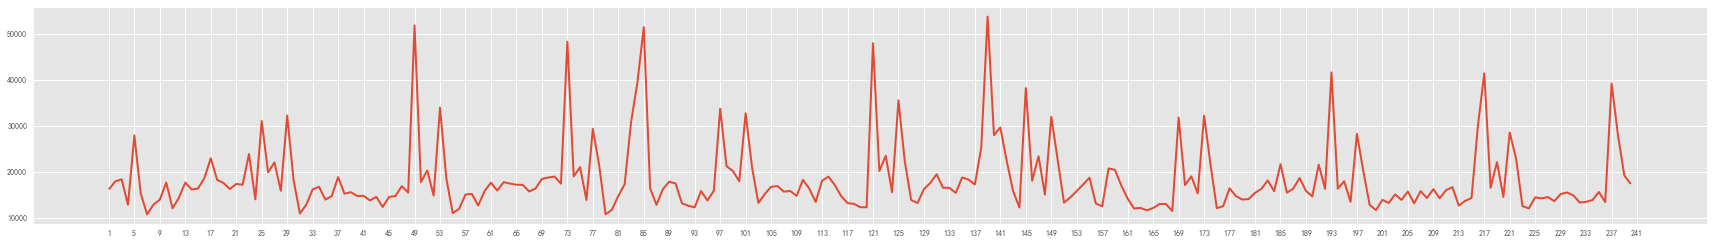

In [211]:
plt.figure(figsize=[30,4])
plt.xticks(range(1,242,4))
plt.plot(range(1,241), sup_weeks_sum)


In [212]:
order = pd.read_csv('orders.csv')
order.columns
ord_weeks_sum = order.drop(['供应商ID', '材料分类'], axis=1).agg('sum')
ord_weeks_sum

W001    18492.0
W002    19304.0
W003    18892.0
W004    18719.0
W005    27707.0
         ...   
W236    18698.0
W237    39107.0
W238    27913.0
W239    19127.0
W240    21027.0
Length: 240, dtype: float64

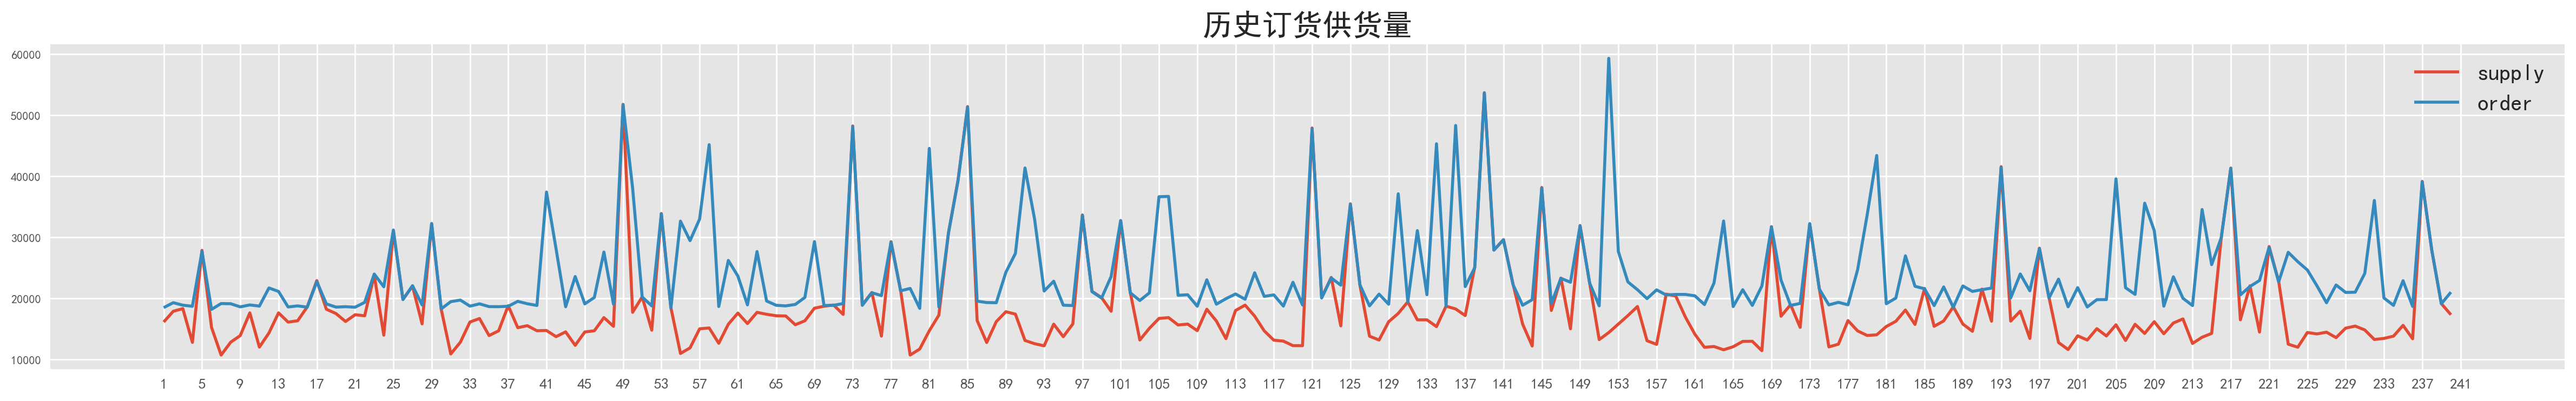

In [213]:
plt.figure(figsize=[30,4],dpi=200)
plt.style.use('ggplot')
plt.xticks(range(1,242,4),fontsize=10)
plt.title('历史订货供货量', fontsize=20)
plt.plot(range(1,241), sup_weeks_sum, label='supply')
plt.plot(range(1,241), ord_weeks_sum, label='order')
# plt.bar(range(1,241), sup_weeks_sum, label='supply')
# plt.bar(range(1,241), ord_weeks_sum, label='order')
plt.legend(fontsize=15)
plt.savefig('历史订货供货量.jpg')

<AxesSubplot:>

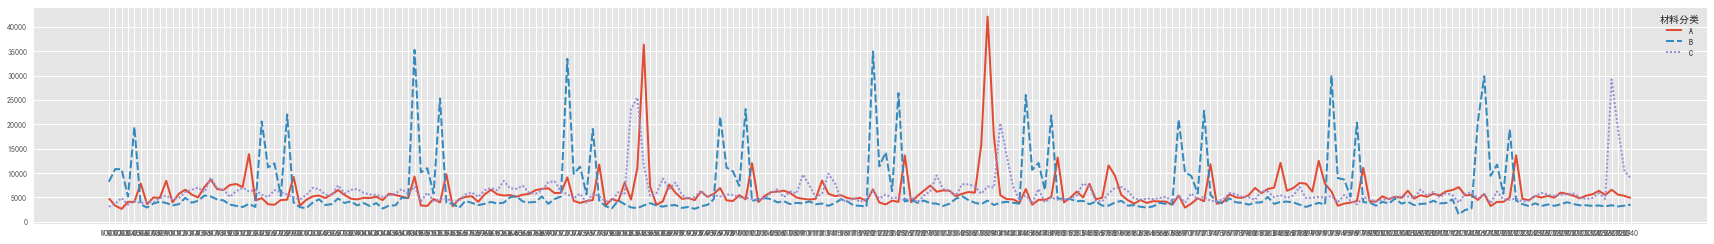

In [214]:
sup_agg_cat = sup.drop('供应商ID', axis=1).groupby('材料分类').agg('sum')
sup_agg_cat = sup_agg_cat.T
plt.figure(figsize=[30,4])
sns.lineplot(data=sup_agg_cat)

<AxesSubplot:xlabel='材料分类', ylabel='材料分类'>

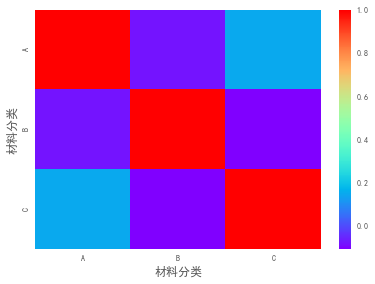

In [215]:
sns.heatmap(sup_agg_cat[['A','B','C']].corr(), cmap='rainbow')

In [216]:
(np.cov(sup_agg_cat['A'],sup_agg_cat['C'])[0,1],
np.cov(sup_agg_cat['A'],sup_agg_cat['B'])[0,1],
np.cov(sup_agg_cat['B'],sup_agg_cat['C'])[0,1])

(1661200.2161959554, -1816734.9632845188, -1907487.5019874475)

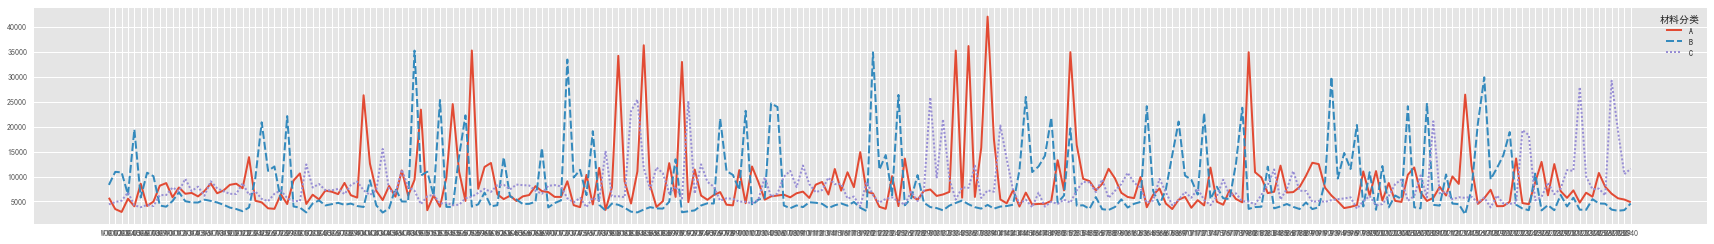

In [217]:
ord_agg_cat = order.drop('供应商ID', axis=1).groupby('材料分类').agg('sum')
ord_agg_cat = ord_agg_cat.T
plt.figure(figsize=[30,4])
sns.lineplot(data=ord_agg_cat)
plt.savefig('ord_agg_cat.jpg')

In [218]:
ord_agg_cat.columns = ['orderA', 'orderB', 'orderC']
sup_agg_cat.columns = ['supplyA', 'supplyB', 'supplyC']

In [219]:
n_df = pd.concat([ord_agg_cat, sup_agg_cat], axis=1)
n_df

,orderA,orderB,orderC,supplyA,supplyB,supplyC
W001,5745.0,8322.0,4425.0,4818,8229,3089
W002,3476.0,10939.0,4889.0,3314,10833,3750
W003,2902.0,10828.0,5162.0,2657,10769,4902
W004,5550.0,6363.0,6806.0,4108,5184,3511
W005,4031.0,19436.0,4240.0,4083,19485,4310
...,...,...,...,...,...,...
W236,7936.0,4549.0,6213.0,5507,3186,4702
W237,6555.0,3368.0,29184.0,6583,3403,29182
W238,5639.0,3142.0,19132.0,5589,3155,19148
W239,5386.0,3271.0,10470.0,5334,3313,10503


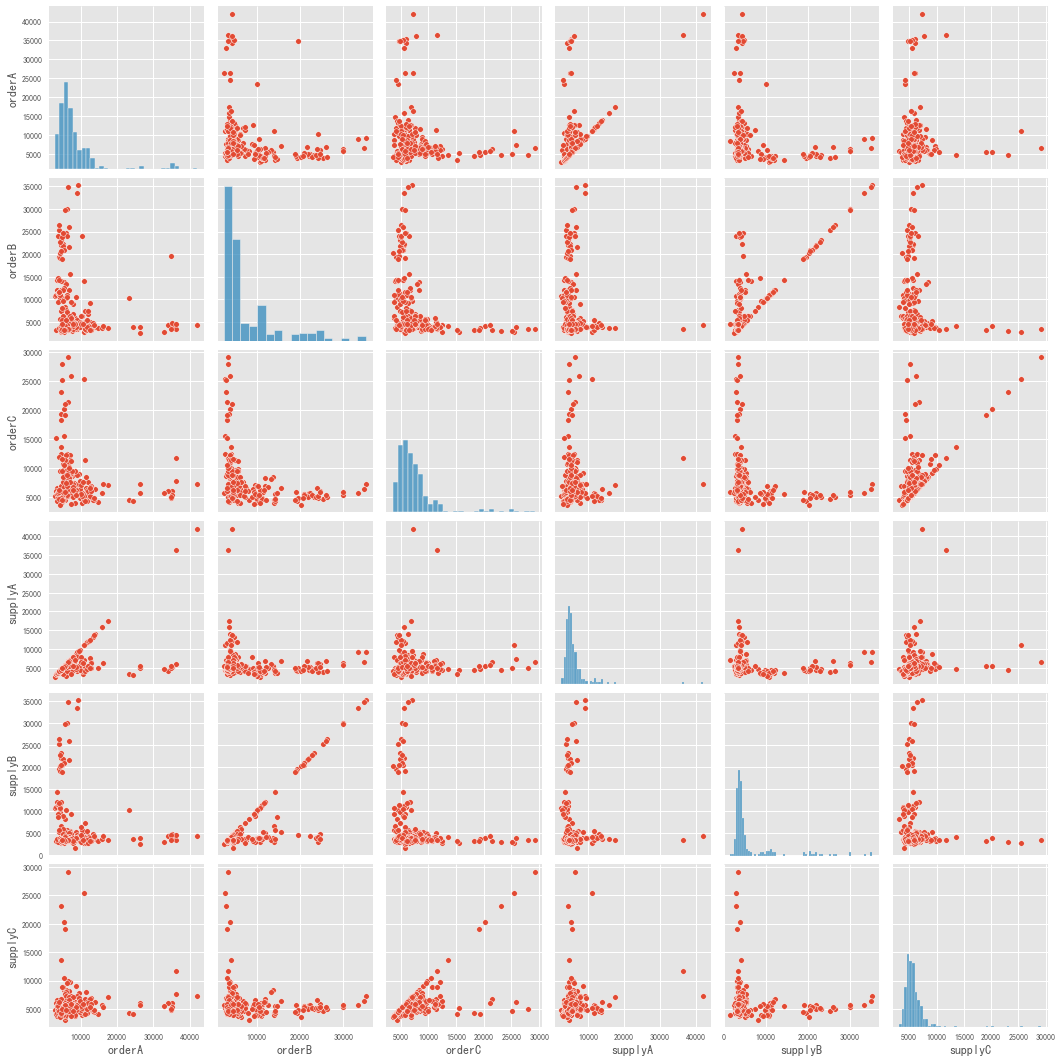

In [220]:
sns.pairplot(n_df)
plt.savefig('pair.jpg')

In [221]:
order = pd.read_csv('orders.csv')
sup = pd.read_csv('supplyer.csv')
order = order.drop([402,403], axis=0)
order

,供应商ID,材料分类,W001,W002,W003,W004,W005,W006,W007,W008,...,W231,W232,W233,W234,W235,W236,W237,W238,W239,W240
0,S001,B,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,S002,A,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,S003,C,7.0,1.0,0.0,0.0,0.0,1.0,4.0,50.0,...,10.0,3.0,50.0,20.0,20.0,7.0,10.0,9.0,20.0,10.0
3,S004,B,0.0,1.0,1.0,100.0,0.0,85.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,S005,A,30.0,60.0,60.0,60.0,70.0,70.0,60.0,70.0,...,80.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,S398,C,0.0,1.0,0.0,70.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,S399,B,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
399,S400,B,0.0,1.0,0.0,60.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
400,S401,B,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [222]:
gap = sup.drop(['供应商ID', '材料分类'], axis=1)-order.drop(['供应商ID', '材料分类'], axis=1)
gap =gap.T
gap

,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
W001,0.0,0.0,1.0,0.0,7.0,0.0,1.0,0.0,0.0,-30.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
W002,0.0,-1.0,0.0,-1.0,2.0,0.0,-56.0,0.0,0.0,-1.0,...,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0
W003,0.0,0.0,0.0,-1.0,0.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
W004,-43.0,0.0,0.0,-100.0,5.0,0.0,-98.0,0.0,0.0,-65.0,...,0.0,0.0,0.0,0.0,0.0,-70.0,0.0,-60.0,0.0,0.0
W005,0.0,0.0,0.0,0.0,6.0,0.0,5.0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W236,1.0,0.0,1.0,0.0,5.0,0.0,9.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
W237,0.0,-1.0,8.0,0.0,4.0,0.0,7.0,-1.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0
W238,0.0,-1.0,1.0,-1.0,4.0,0.0,-11.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
W239,0.0,0.0,2.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0


In [223]:
gap_array = np.array(gap.sum(axis=1)).reshape(10,24).sum(axis=0)

<BarContainer object of 24 artists>

D:\programs\envs\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\programs\envs\python36\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


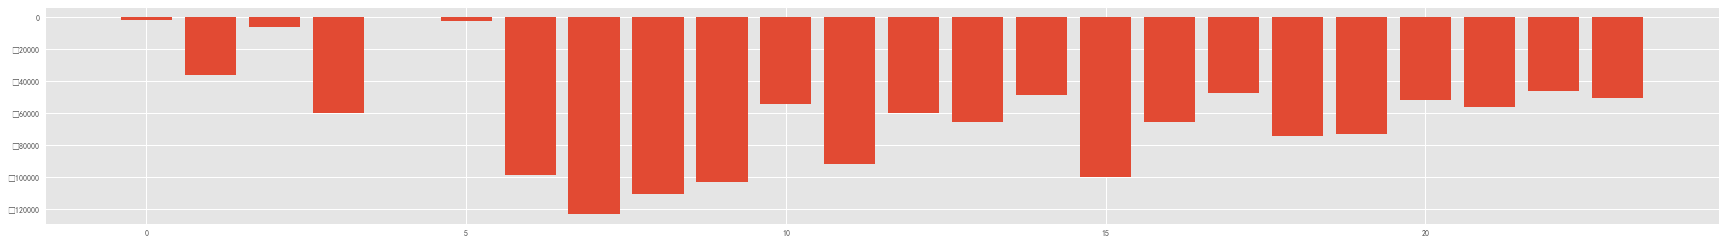

In [224]:
plt.figure(figsize=[30,4])
plt.bar(x=range(24), height=np.array(gap.sum(axis=1)).reshape(10,24).sum(axis=0))

In [225]:
sup_week = np.array(sup.drop(['供应商ID', '材料分类'], axis=1).agg('sum'))
sup_week = sup_week.reshape(10,24).sum(axis=0)
sup_week

array([381592, 183655, 207445, 148905, 312315, 203695, 120984, 128145,
       153171, 160434, 166520, 171017, 195386, 162762, 166513, 158892,
       173281, 166072, 191667, 160339, 184960, 170850, 169341, 162065],
      dtype=int64)

In [226]:
ratio = gap_array/sup_week
pd.DataFrame(ratio).to_csv('gap_ratio.csv')

In [227]:
a_1 = pd.read_csv('A_1.csv')

a_1 = a_1.drop(['mat','id'], axis=1)
a_1

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,NaN,0.514930,NaN,NaN,0.306436,0.606459,NaN,NaN,0.376712,0.037843,...,NaN,NaN,NaN,NaN,NaN,NaN,0.933550,NaN,NaN,NaN
1,0.576086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.078725,NaN,...,0.742255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.016531,NaN
2,85.971802,NaN,NaN,23.314253,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.325417,NaN,NaN,NaN,45.043985,NaN,NaN
3,NaN,NaN,0.447471,NaN,NaN,NaN,NaN,NaN,0.036890,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.084933,NaN,0.771864,NaN
4,NaN,160.898669,NaN,153.479594,NaN,NaN,137.82368,NaN,148.561281,NaN,...,NaN,143.366031,NaN,NaN,NaN,162.794245,169.837318,177.231180,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,NaN,1.682587,NaN,0.596949,NaN,NaN,NaN,NaN,0.559082,NaN,...,NaN,NaN,NaN,0.312566,0.50798,NaN,NaN,0.064518,NaN,NaN
398,NaN,NaN,1.428166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.043598,NaN,NaN,NaN,0.756204,NaN,NaN,1.017956,NaN
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,1.310870,NaN,NaN,NaN,NaN,0.182967,NaN,NaN,NaN,NaN,...,NaN,NaN,0.114488,NaN,NaN,NaN,0.245431,0.434611,NaN,NaN


In [228]:
i=0
for col in a_1.columns:
    a_1[col] = np.array(a_1[col]*(1-ratio[i]))
    i+=1
a_1.to_csv('A_1.csv', index=False)

D:\programs\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

D:\programs\envs\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\programs\envs\python36\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


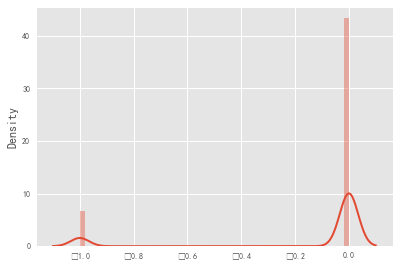

In [229]:
binned_gap = gap.copy()
def binned(lis):
    return [-1 if x<0 else 0 for x in lis]
for col in binned_gap.columns:
    collis = binned_gap[col].values
    binned_gap[col] = binned(collis)
sns.distplot(binned_gap)

In [230]:
gap


,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
W001,0.0,0.0,1.0,0.0,7.0,0.0,1.0,0.0,0.0,-30.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
W002,0.0,-1.0,0.0,-1.0,2.0,0.0,-56.0,0.0,0.0,-1.0,...,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0
W003,0.0,0.0,0.0,-1.0,0.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
W004,-43.0,0.0,0.0,-100.0,5.0,0.0,-98.0,0.0,0.0,-65.0,...,0.0,0.0,0.0,0.0,0.0,-70.0,0.0,-60.0,0.0,0.0
W005,0.0,0.0,0.0,0.0,6.0,0.0,5.0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W236,1.0,0.0,1.0,0.0,5.0,0.0,9.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
W237,0.0,-1.0,8.0,0.0,4.0,0.0,7.0,-1.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0
W238,0.0,-1.0,1.0,-1.0,4.0,0.0,-11.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
W239,0.0,0.0,2.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0


In [231]:
gap_ratio = gap / order.drop(['供应商ID', '材料分类'], axis=1).T
gap_ratio

,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
W001,NaN,0.0,0.142857,NaN,0.233333,NaN,0.125000,NaN,NaN,-1.0,...,NaN,NaN,0.005319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W002,NaN,-1.0,0.000000,-1.0,0.033333,NaN,-0.373333,NaN,NaN,-1.0,...,NaN,-1.0,NaN,NaN,0.0,-1.0,NaN,-1.0,NaN,NaN
W003,NaN,NaN,NaN,-1.0,0.000000,NaN,0.233333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN
W004,-1.0,0.0,NaN,-1.0,0.083333,NaN,-0.490000,NaN,NaN,-1.0,...,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,-1.0,NaN,NaN
W005,NaN,NaN,NaN,NaN,0.085714,NaN,0.250000,-1.0,-1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W236,1.0,NaN,0.142857,NaN,0.071429,NaN,0.900000,NaN,NaN,NaN,...,-1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,-1.0
W237,NaN,-1.0,0.800000,NaN,0.057143,NaN,0.700000,-1.0,NaN,NaN,...,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN,-1.0,NaN,NaN
W238,NaN,-1.0,0.111111,-1.0,0.057143,NaN,-0.366667,NaN,NaN,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
W239,NaN,NaN,0.100000,NaN,0.085714,NaN,0.050000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,-1.0,NaN


D:\programs\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

D:\programs\envs\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\programs\envs\python36\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


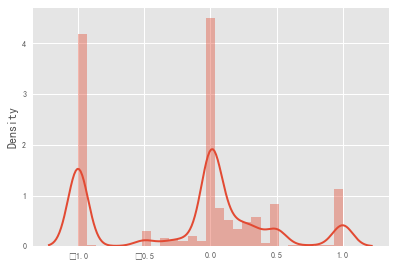

In [232]:
sns.distplot(gap_ratio)

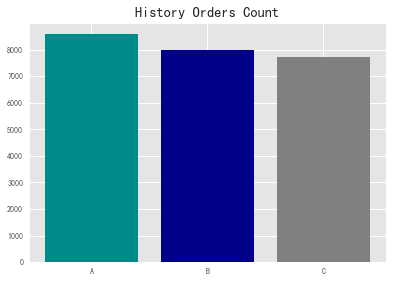

In [233]:
ord_agg_cat
cat_sum = ord_agg_cat.agg('sum')
plt.bar(x=['A','B','C'],height=cat_sum.values/240,color=['darkcyan','darkblue','gray'])
plt.title('History Orders Count')
plt.savefig('History Orders Count.jpg')

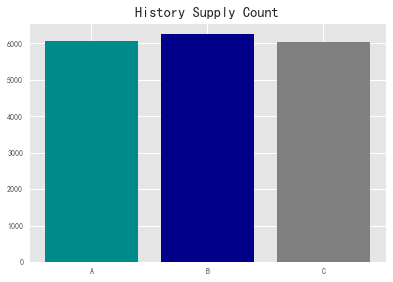

In [234]:

sup_sum = sup_agg_cat.agg('sum')
plt.bar(x=['A','B','C'],height=sup_sum.values/240,color=['darkcyan','darkblue','gray'])
plt.title('History Supply Count')
plt.savefig('History Supply Count.jpg')

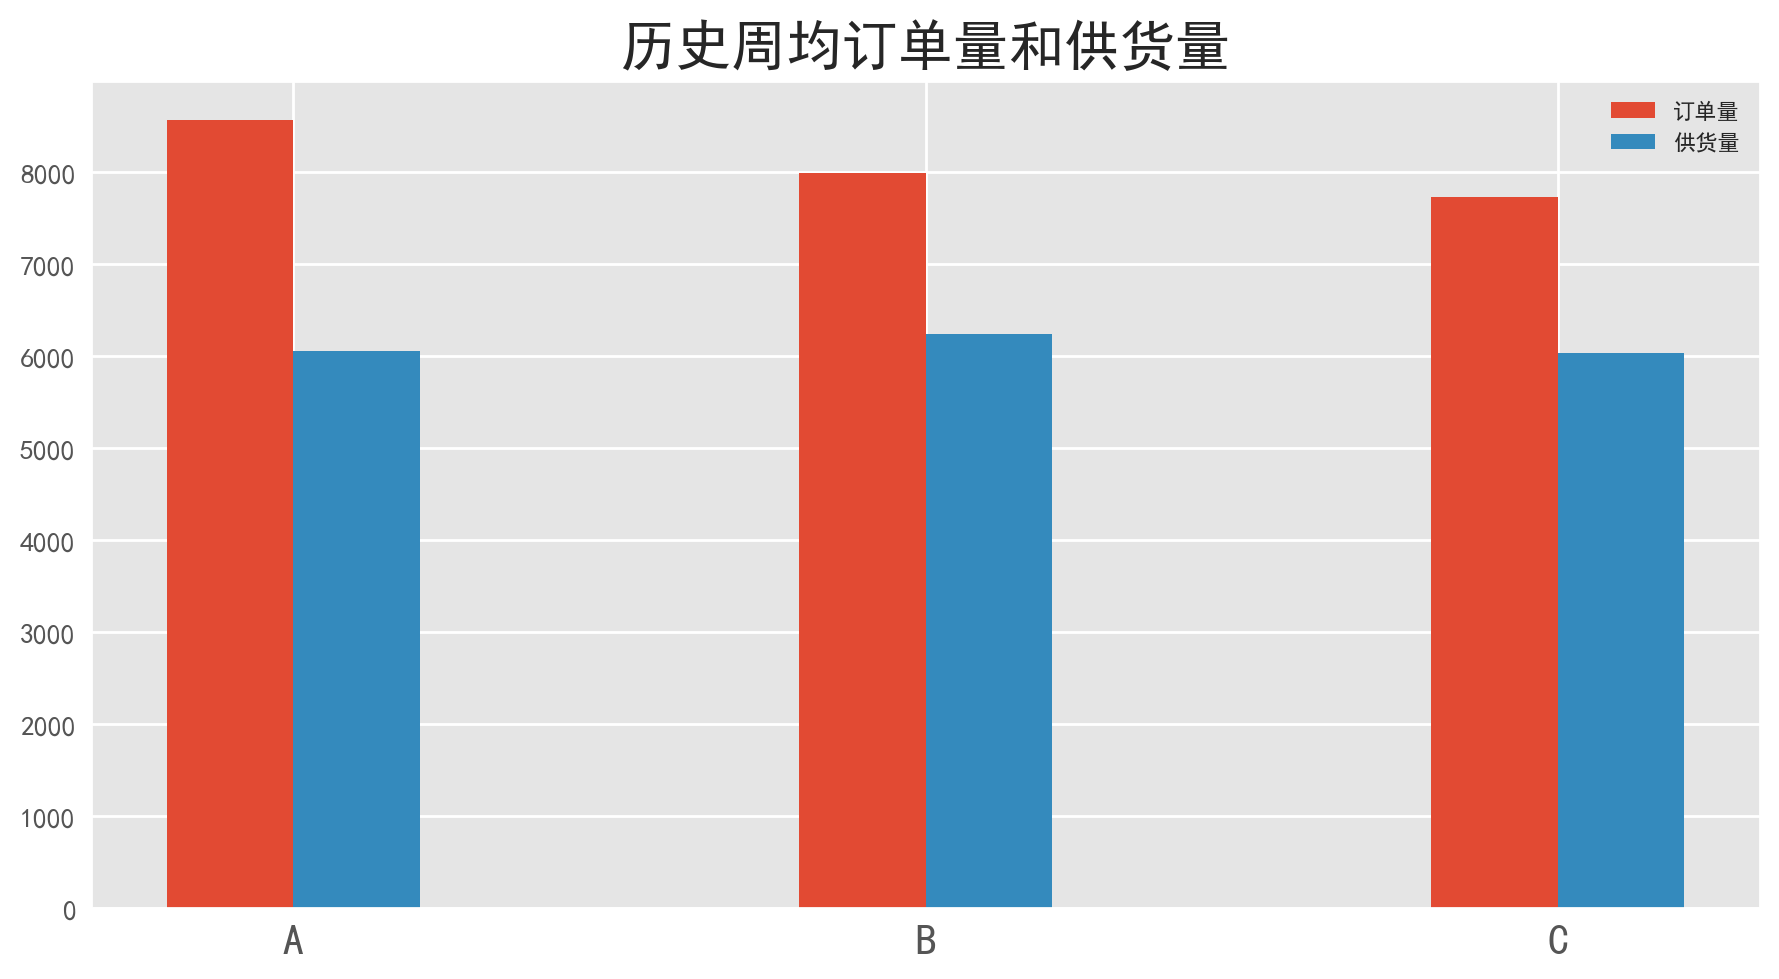

In [235]:
plt.style.use('ggplot')
plt.figure(dpi = 200, figsize =[9,5] )
x_index = np.arange(3)   #柱的索引
x_data = ('A', 'B', 'C')
y1_data = cat_sum.values/240
y2_data = sup_sum.values/240
bar_width = 0.2  #定义一个数字代表每个独立柱的宽度
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
rects1 = plt.bar(x_index, y1_data, width=bar_width ,label='订单量')            #参数：左偏移、高度、柱宽、透明度、颜色、图例
rects2 = plt.bar(x_index + bar_width, y2_data, width=bar_width,label='供货量') #参数：左偏移、高度、柱宽、透明度、颜色、图例
plt.yticks(fontsize=10)   
plt.xticks(x_index + bar_width/2, x_data, fontsize=15)   
plt.legend()    
plt.title('历史周均订单量和供货量', fontsize = 20)
plt.tight_layout()  

plt.savefig('历史周均订单量和供货量.jpg')

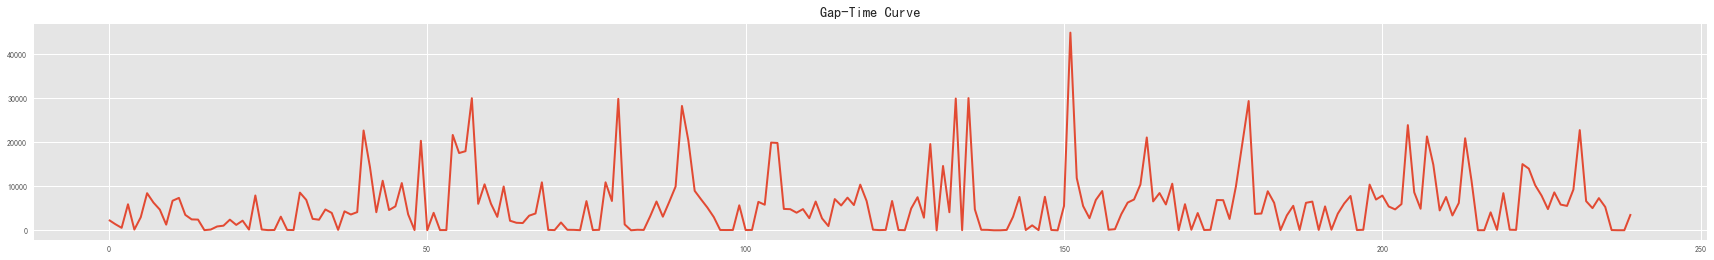

In [236]:
plt.figure(figsize=[30,4])
plt.title('Gap-Time Curve')
sns.lineplot(x=range(240), y=abs(gap.T.sum()))
plt.savefig('Gap-Time Curve.jpg')

In [237]:
order_eqC = order.T
for col in order_eqC.columns:
    colu = order_eqC[col]
    cat = colu[1]
    if cat == 'A':
        order_eqC[col][2:] = colu[2:]*1.2
    elif cat == 'B':
        order_eqC[col][2:] = colu[2:]*1.091

order_eqC = order_eqC.T
order_eqC.to_csv('order_eqC.csv', index=False)
order_eqC.head()

,供应商ID,材料分类,W001,W002,W003,W004,W005,W006,W007,W008,...,W231,W232,W233,W234,W235,W236,W237,W238,W239,W240
0,S001,B,0,0,0,46.913,0,0,0,0,...,1.091,0,0,1.091,0,1.091,0,0,0,0
1,S002,A,1.2,1.2,0,1.2,0,0,0,0,...,0,0,1.2,0,0,0,1.2,1.2,0,1.2
2,S003,C,7,1,0,0,0,1,4,50,...,10,3,50,20,20,7,10,9,20,10
3,S004,B,0,1.091,1.091,109.1,0,92.735,0,0,...,1.091,0,1.091,0,0,0,0,1.091,0,0
4,S005,A,36,72,72,72,84,84,72,84,...,96,84,84,84,84,84,84,84,84,96


In [238]:
supply_eqC = sup.T
for col in supply_eqC.columns:
    colu = supply_eqC[col]
    cat = colu[1]
    if cat == 'A':
        supply_eqC[col][2:] = colu[2:]*1.2
    elif cat == 'B':
        supply_eqC[col][2:] = colu[2:]*1.091

supply_eqC = supply_eqC.T
supply_eqC.to_csv('supply_eqC.csv', index=False)
supply_eqC.head()

,供应商ID,材料分类,W001,W002,W003,W004,W005,W006,W007,W008,...,W231,W232,W233,W234,W235,W236,W237,W238,W239,W240
0,S001,B,0,0,0,0,0,0,0,0,...,0,0,0,1.091,0,2.182,0,0,0,0
1,S002,A,1.2,0,0,1.2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.2
2,S003,C,8,1,0,0,0,1,5,58,...,9,4,54,20,20,8,18,10,22,11
3,S004,B,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,S005,A,44.4,74.4,72,78,91.2,91.2,78,85.2,...,100.8,93.6,92.4,94.8,93.6,90,88.8,88.8,91.2,97.2


In [239]:

avg_need_eqC = (2.82*10**4)*0.72
'每周生产需求(eqC)：'+str((2.82*10**4)*0.72)

'每周生产需求(eqC)：20304.0'

In [240]:
trans = pd.read_csv('trans.csv')
def replace0(x):
    if x == 0:
        return np.nan
    else:
        return x
    
notnull = 8*240 - trans.isnull().sum().sum()
avg_los = (trans.sum().values[1:].sum()/notnull)*0.01

'有运输时的平均货损率：'+str(avg_los)


'有运输时的平均货损率：0.010008054687500005'

<Figure size 1280x880 with 0 Axes>

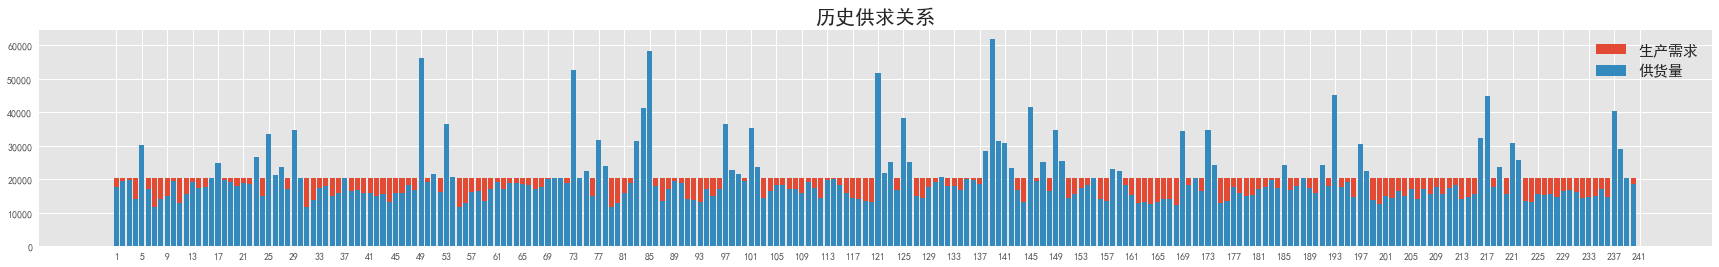

In [241]:
plt.style.use('ggplot')
plt.figure(dpi=200)
need_array_eqC = np.array([avg_need_eqC for i in range(240)])
supply_eqC = pd.read_csv('supply_eqC.csv')
sup_weeks_sum_eqC = supply_eqC.drop(['供应商ID', '材料分类'], axis=1).agg('sum')
sup_weeks_sum_eqC = np.array(sup_weeks_sum_eqC.values*(1-avg_los))
plt.figure(figsize=[30,4])
plt.xticks(range(1,242,4),fontsize=10)

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.yticks(fontsize=10)   
plt.title('历史供求关系', fontsize = 20)
plt.bar(x=range(1,241), height=need_array_eqC, label='生产需求')
plt.bar(x=range(1,241), height=sup_weeks_sum_eqC, label='供货量')

plt.legend(fontsize = 15)

plt.savefig('历史供求关系.jpg')

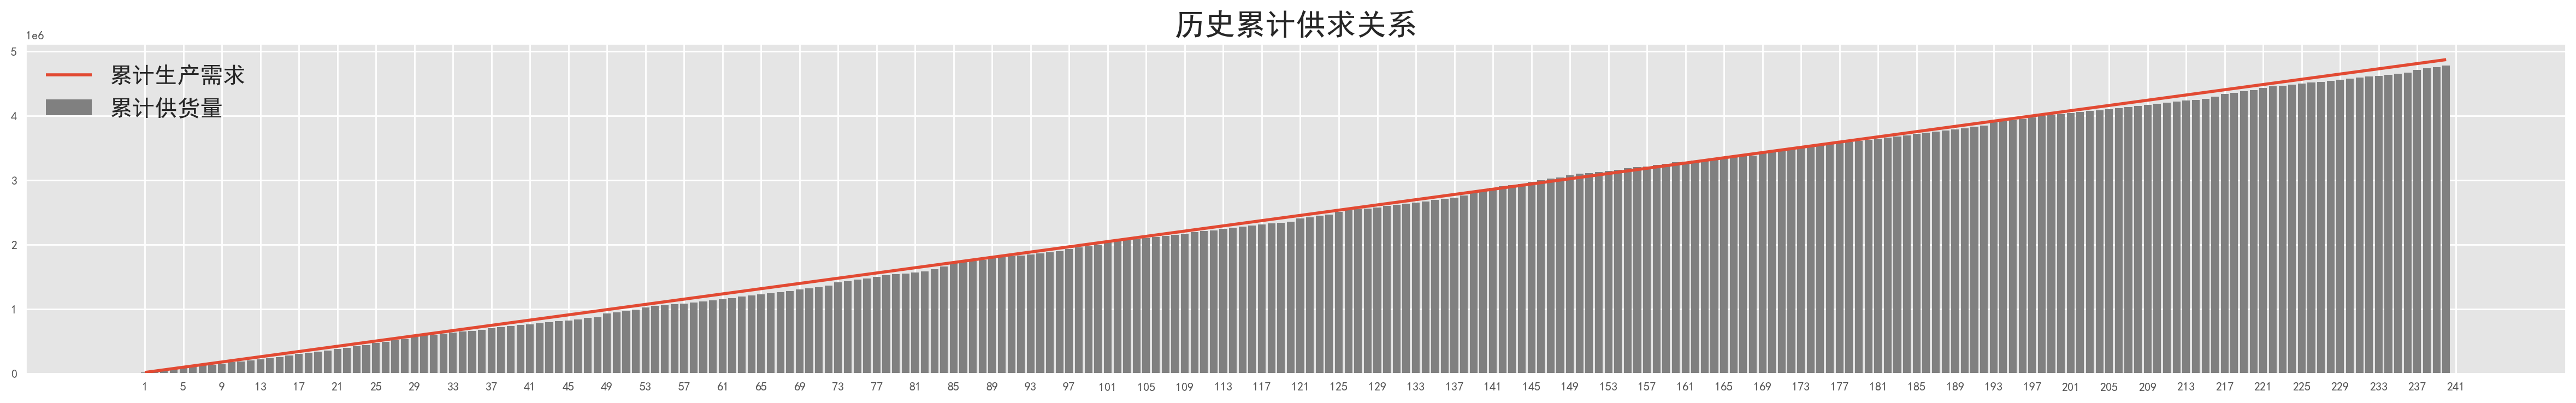

In [242]:
plt.style.use('ggplot')
need_cum_eqC = need_array_eqC.cumsum()
sup_cum_eqC = sup_weeks_sum_eqC.cumsum()

plt.figure(figsize=[30,4],dpi=200)
plt.xticks(range(1,242,4))

plt.plot(range(1,241), need_cum_eqC,  label='累计生产需求')
plt.bar(x=range(1,241), height=sup_cum_eqC, color='gray',label='累计供货量')
plt.legend(fontsize=15)
plt.title('历史累计供求关系', fontsize=20)
plt.savefig('历史累计供求关系.jpg')

D:\programs\envs\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\programs\envs\python36\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


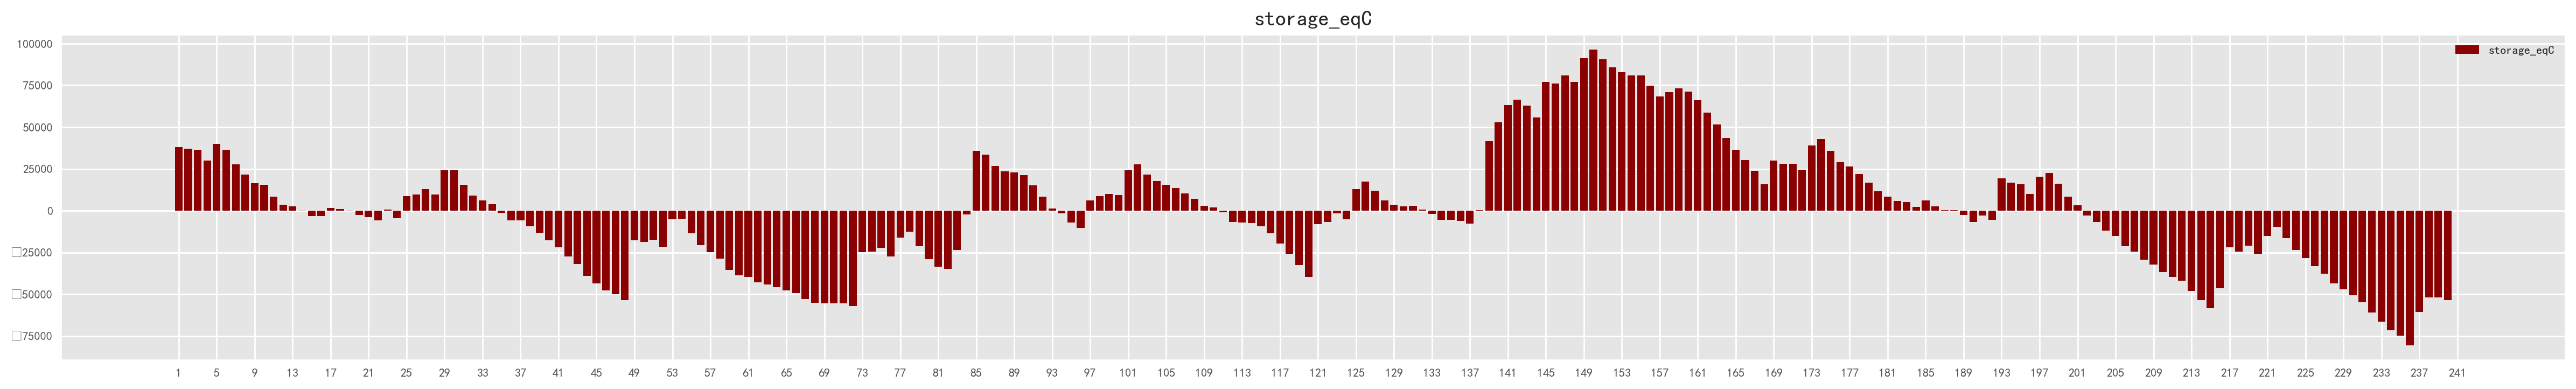

In [243]:
storage_eqC = sup_cum_eqC - need_cum_eqC + 2*avg_need_eqC

plt.figure(figsize=[30,4],dpi=200)
plt.xticks(range(1,242,4))
plt.bar(x=range(1,241), height=storage_eqC, label='storage_eqC', color='darkred')
plt.legend()
plt.title('storage_eqC')
plt.savefig('storage_eqC.jpg')

In [244]:
reshape_storage = storage_eqC.reshape(5,48)
annual_storage = [reshape_storage[:,i] for i in range(48)]

avg_annual_storage = [sum(i)/5 for i in annual_storage]




In [245]:
avg_annual_storage = np.array(avg_annual_storage)
avg_annual_storage += avg_need_eqC*2

In [246]:
len(avg_annual_storage)

48

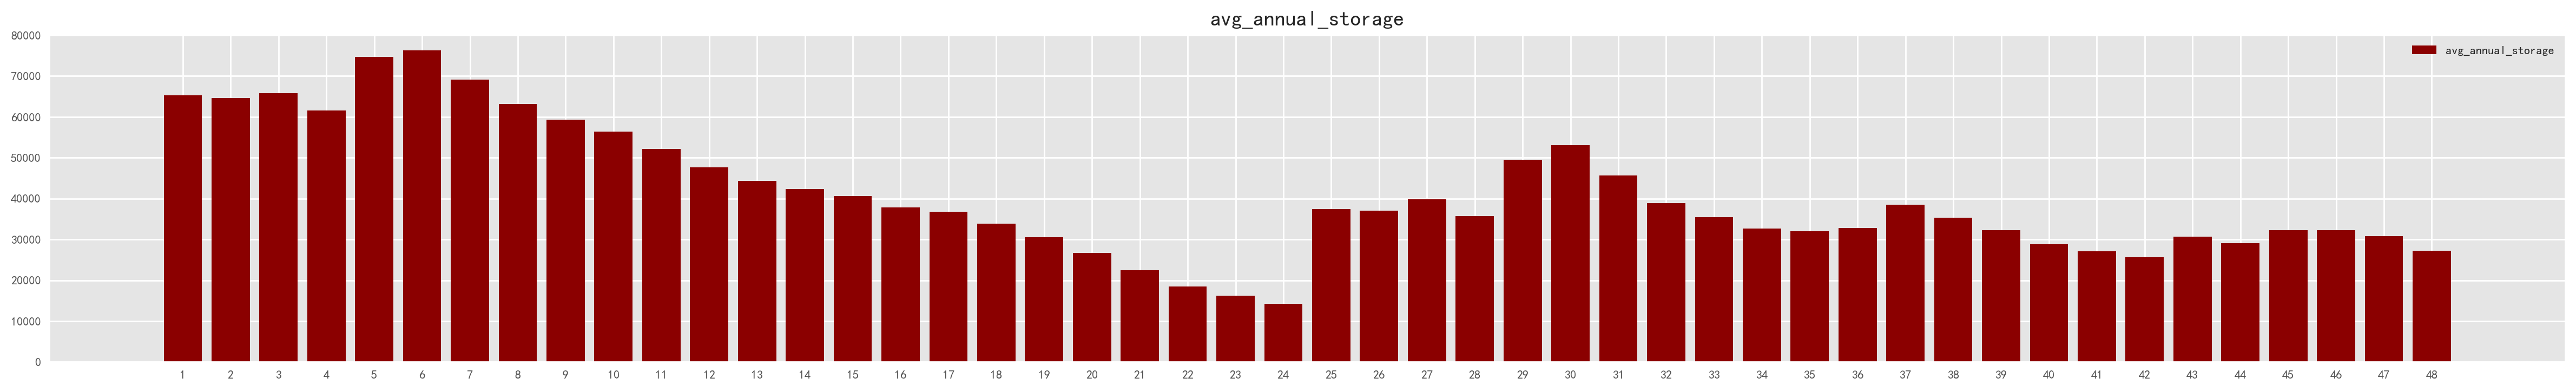

In [247]:
plt.figure(figsize=[30,4],dpi=200)
plt.xticks(range(1,49))
plt.bar(x=range(1,49), height=avg_annual_storage, label='avg_annual_storage', color='darkred')
plt.legend()
plt.title('avg_annual_storage')
plt.savefig('avg_annual_storage.jpg')

----

# Problem 1

In [248]:
supply_eqC.T

,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
供应商ID,S001,S002,S003,S004,S005,S006,S007,S008,S009,S010,...,S393,S394,S395,S396,S397,S398,S399,S400,S401,S402
材料分类,B,A,C,B,A,C,A,C,B,B,...,B,A,A,A,B,C,B,B,B,B
W001,0,1.2,8,0,44.4,0,10.8,0,0,0,...,0,0,1134,0,0,0,0,0,0,0
W002,0,0,1,0,74.4,0,112.8,0,0,0,...,0,0,0,0,1.091,0,0,0,0,0
W003,0,0,0,0,72,0,44.4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W236,2.182,0,8,0,90,0,22.8,0,0,0,...,0,0,0,0,1.091,0,0,0,0,0
W237,0,0,18,0,88.8,0,20.4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
W238,0,0,10,0,88.8,0,22.8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
W239,0,0,22,0,91.2,0,25.2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [249]:
n_sup = pd.DataFrame()
n_sup['id'] = supply_eqC['供应商ID']
n_sup['supply_amount'] = supply_eqC.drop(['供应商ID','材料分类'], axis=1).sum(axis=1)
n_sup['avg_gap'] = gap.T.sum(axis=1).values/n_sup['supply_amount']


In [250]:
non_zero_count = []
for col in order_eqC.T.columns:
    array = np.array(order_eqC.T[col])
    zeros = np.zeros(len(array))
    not_zero = zeros!=array
    non_zero_count.append(not_zero.sum()-2)

In [251]:
supply_zero_count = []
for col in supply_eqC.T.columns:
    array = np.array(supply_eqC.T[col])
    zeros = np.zeros(len(array))
    is_zero = zeros==array
    supply_zero_count.append(is_zero.sum())

In [252]:
cnt=0
var = []
for col in supply_eqC.T.columns:
    array = np.array(supply_eqC.T[col])[2:]
    avg = array/non_zero_count[cnt]
    var.append(sum((array-avg)**3)/non_zero_count[cnt])
    # var.append(sum((array-avg))/non_zero_count[cnt])
    cnt += 1


In [253]:
n_sup['annul_var'] = var
n_sup['supply_zero_count'] =supply_zero_count

In [254]:
n_sup.to_csv('supply_features.csv', index=False)

In [255]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [256]:
x_train = n_sup.drop('id', axis=1)
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)

In [257]:
x_train_std.shape

(402, 4)

In [258]:
cov_matrix = np.cov(x_train_std.T)
eigen_val, eigen_vec = np.linalg.eig(cov_matrix)
eigen_val

array([1.7047757 , 0.38347428, 0.9123168 , 1.00940829])

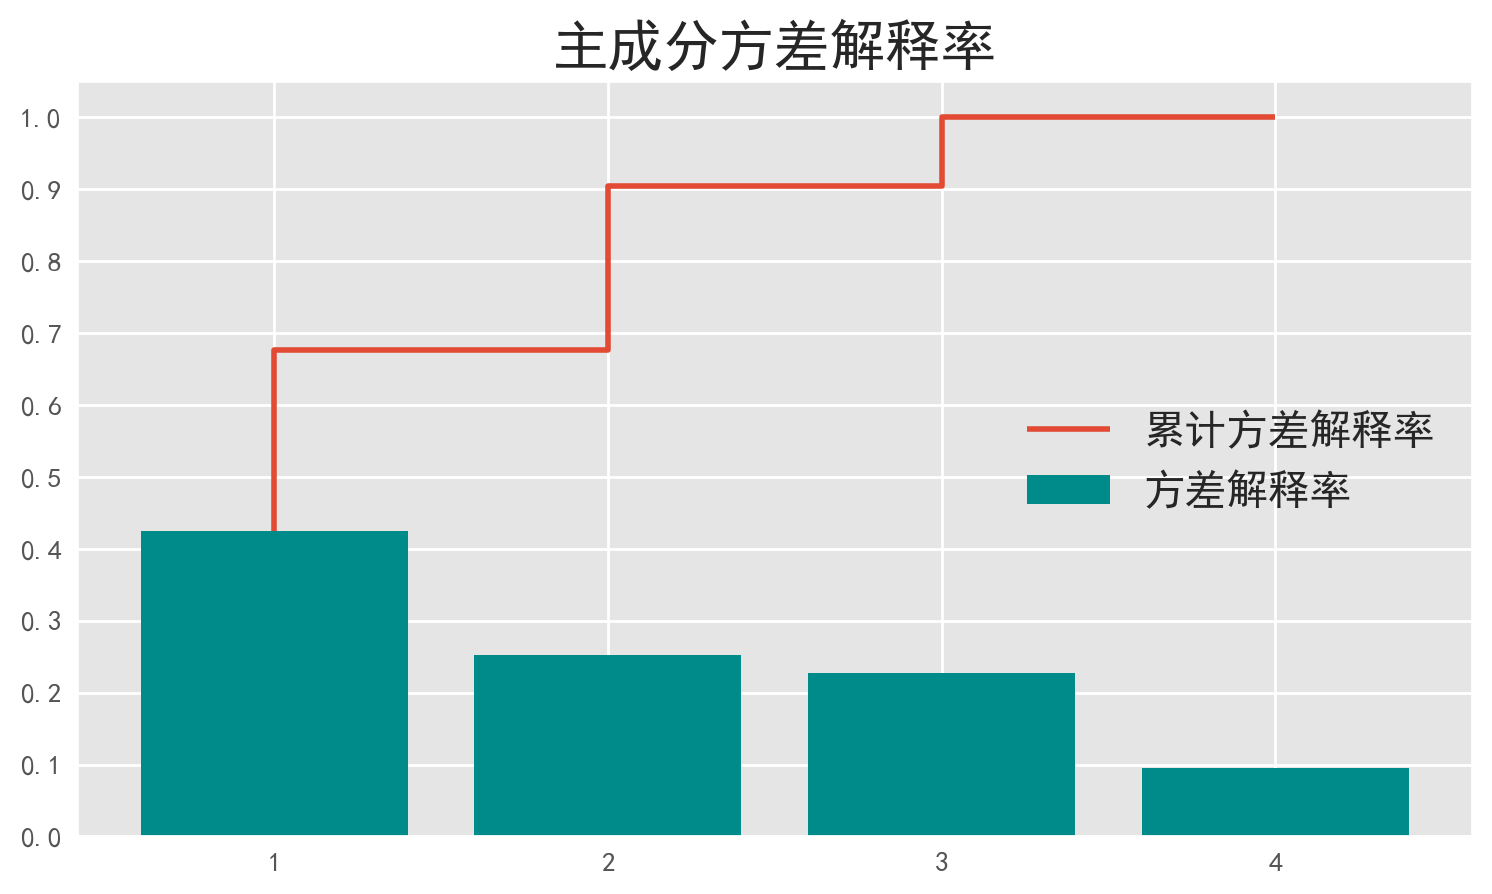

In [259]:
plt.style.use('ggplot')
plt.figure(dpi = 200, figsize =[9,5] )

var_ratio = sorted(eigen_val/(eigen_val.sum()), reverse=True)
cum_var_ratio = np.cumsum(var_ratio)
plt.step(x = range(1,5), y = cum_var_ratio,
        label = '累计方差解释率')
plt.bar(x = range(1,5), height = var_ratio, color='darkcyan' ,
        label = '方差解释率')
plt.xticks([1,2,3,4], fontsize=10) 
plt.yticks(np.arange(0,1.1,0.1), fontsize=10)   

plt.title('主成分方差解释率',fontsize = 20)
plt.legend(loc = 'right',fontsize=15)
plt.savefig('主成分方差解释率.jpg')

In [260]:
var_ratio

[0.4251337404635987,
 0.2517243299215734,
 0.22751183763869579,
 0.09563009197613219]

In [261]:
eigen_pairs = [(np.abs(eigen_val[i]), 
                eigen_vec[:,i]) for i in range(len(eigen_val))]

eigen_pairs.sort(key=lambda k:k[0], reverse=True)

In [262]:
w = np.c_[eigen_pairs[0][1],eigen_pairs[1][1]]
w

array([[-0.67386709,  0.10989009],
       [-0.16956806, -0.85006659],
       [-0.35969052,  0.48671668],
       [ 0.62271386,  0.1685759 ]])

In [263]:
x_train_pca = x_train_std.dot(w)
x_train_pca


array([[ 5.19805771e-01, -1.28169271e-01],
       [ 1.12258918e-01, -2.65776573e-01],
       [-1.11389452e+00, -5.15697180e-01],
       [ 4.61403588e-01, -9.19568874e-02],
       [-3.16856679e-01, -3.32186349e-01],
       [ 6.44249947e-01,  2.28369577e-03],
       [-1.46637575e+00, -6.42948052e-01],
       [ 6.02449675e-01, -1.24489997e-01],
       [ 6.03187174e-01,  4.25260926e-02],
       [ 4.55125018e-01, -1.55545062e-01],
       [ 4.52520807e-01, -1.76292629e-01],
       [ 6.40954693e-01, -5.48354761e-02],
       [ 5.56810526e-01, -1.48219560e-01],
       [ 5.91739415e-01, -1.37781341e-01],
       [ 2.14093167e+00,  7.58755247e+00],
       [ 5.82761820e-01, -1.40993161e-01],
       [ 5.12448134e-01, -1.56468153e-01],
       [ 4.62586445e-01, -1.67794291e-01],
       [ 6.27435582e-01, -1.16167966e-01],
       [ 4.46961782e-01, -1.64188924e-01],
       [ 3.70719289e-01, -1.75860622e-01],
       [ 5.91455115e-01, -1.28916393e-01],
       [-4.36159503e-01, -3.75312229e-01],
       [ 3.

In [264]:
n_sup['pc'] = (x_train_pca[:,0]*var_ratio[0] + x_train_pca[:,1]*var_ratio[1])/(var_ratio[0]+var_ratio[1])

In [265]:
n_sup = n_sup.set_index('pc').sort_index()
n_sup.to_csv('n_sup.csv')

----
# Problem 2

In [266]:
pred_eqC = supply_eqC.drop(['供应商ID','材料分类'], axis=1).T
pred_eqC.head(10)

,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
W001,0.0,1.2,8.0,0.0,44.4,0.0,10.8,0.0,0.0,0.000,...,0.0,0.0,1134.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0
W002,0.0,0.0,1.0,0.0,74.4,0.0,112.8,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,1.091,0.0,0.0,0.000,0.0,0.0
W003,0.0,0.0,0.0,0.0,72.0,0.0,44.4,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0
W004,0.0,1.2,0.0,0.0,78.0,0.0,122.4,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0
W005,0.0,0.0,0.0,0.0,91.2,0.0,30.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0
W006,0.0,0.0,1.0,0.0,91.2,0.0,25.2,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0
W007,0.0,0.0,5.0,0.0,78.0,0.0,26.4,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0
W008,0.0,0.0,58.0,0.0,85.2,0.0,18.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0
W009,0.0,0.0,110.0,0.0,86.4,0.0,22.8,0.0,0.0,1.091,...,0.0,0.0,0.0,0.0,1.091,0.0,0.0,4.364,0.0,0.0
W010,0.0,2.4,173.0,0.0,96.0,0.0,18.0,0.0,0.0,14.183,...,0.0,0.0,805.2,0.0,0.000,0.0,0.0,3.273,0.0,0.0


In [267]:
pred_eqC[4]

W001    44.4
W002    74.4
W003    72.0
W004    78.0
W005    91.2
        ... 
W236    90.0
W237    88.8
W238    88.8
W239    91.2
W240    97.2
Name: 4, Length: 240, dtype: float64

In [268]:
from fbprophet import Prophet
df = pd.read_csv('pred_data.csv')
df['ds'] = pd.to_datetime(df['ds'])

Importing plotly failed. Interactive plots will not work.


In [269]:
df

,ds
0,2016-01-01
1,2016-01-08
2,2016-01-15
3,2016-01-22
4,2016-01-29
...,...
235,2020-07-03
236,2020-07-10
237,2020-07-17
238,2020-07-24


In [270]:
pred_result = pd.DataFrame()
for col in pred_eqC.columns:
    print(col/402*100)
    y = pred_eqC[col].values
    df['y'] = y
    m = Prophet(
                yearly_seasonality=True
                )
    m.fit(df)
    future = m.make_future_dataframe(
                                    periods = 24,
                                    freq='W'
                                    )
    forecast = m.predict(future)
    result = forecast['yhat'][240:].values
    pred_result[col] = result
pred_result.to_csv('TSA_pred.csv')

0.0


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0.24875621890547264


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0.4975124378109453


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0.7462686567164178


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0.9950248756218906


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


1.2437810945273633


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


1.4925373134328357


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


1.7412935323383085


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


1.9900497512437811


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2.2388059701492535


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2.4875621890547266


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2.736318407960199


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2.9850746268656714


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


3.233830845771144


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


3.482587064676617


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


3.731343283582089


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


3.9800995024875623


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


4.228855721393035


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


4.477611940298507


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


4.72636815920398


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


4.975124378109453


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


5.223880597014925


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


5.472636815920398


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


5.721393034825871


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


5.970149253731343


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


6.218905472636816


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


6.467661691542288


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


6.7164179104477615


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


6.965174129353234


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


7.213930348258707


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


7.462686567164178


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


7.711442786069651


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


7.960199004975125


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


8.208955223880597


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


8.45771144278607


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


8.706467661691542


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


8.955223880597014


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


9.203980099502488


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


9.45273631840796


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


9.701492537313433


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


9.950248756218906


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


10.199004975124378


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


10.44776119402985


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


10.696517412935323


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


10.945273631840797


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


11.194029850746269


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


11.442786069651742


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


11.691542288557214


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


11.940298507462686


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


12.189054726368159


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


12.437810945273633


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


12.686567164179104


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


12.935323383084576


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


13.184079601990051


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


13.432835820895523


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


13.681592039800993


In [ ]:
pred_result = pd.read_csv('TSA_decided.csv')
pred_result

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,0,0.037573,0.593406,0.128834,-0.000000,0.130973,0.175121,0.465163,0.406146,-0.000000,...,0.114066,-0.000000,-0.000000,-0.000000,0.443472,1.151986,0.126932,-0.000000,-0.000000,-0.000000
1,1,0.050679,0.462075,1.537707,-0.000000,2.840340,3.432581,-0.000000,0.910105,1.590167,...,0.897063,1.567347,1.275574,3.218643,1.890339,3.744556,7.721466,6.962925,17.131529,22.986116
2,2,34.975224,11.938873,-0.000000,-0.000000,2.377813,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,13.843702,19.722377
3,3,0.415028,0.577760,0.426602,-0.000000,-0.000000,0.665359,0.023173,-0.000000,0.147634,...,-0.000000,-0.000000,-0.000000,-0.000000,0.050469,-0.000000,-0.000000,0.345570,0.147969,0.185491
4,4,89.424173,87.257284,82.724724,74.548647,69.370900,67.188468,72.513090,77.982684,75.389891,...,75.422024,72.462745,70.708906,71.586161,71.931488,79.630079,86.759905,82.758010,83.977612,93.552699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,397,0.895708,1.629241,0.783627,-0.000000,-0.000000,-0.000000,-0.000000,0.328464,0.216280,...,-0.000000,-0.000000,-0.000000,-0.000000,0.498084,0.352284,-0.000000,0.243931,0.063833,-0.000000
398,398,0.347803,1.156118,1.018307,-0.000000,-0.000000,-0.000000,-0.000000,0.314371,0.568362,...,0.058227,0.188370,-0.000000,0.142131,0.880172,0.140415,0.100521,1.314652,0.582827,-0.000000
399,399,-0.000000,1.520547,0.621529,-0.000000,-0.000000,0.086967,0.061592,0.407465,-0.000000,...,-0.000000,0.075584,-0.000000,0.149780,-0.000000,-0.000000,0.097333,-0.000000,0.330878,0.255816
400,400,0.746607,2.371173,1.659192,-0.000000,0.511854,0.700973,0.302585,0.659173,0.492261,...,0.515083,0.595233,0.408291,0.653334,0.967321,0.852014,0.785440,0.832123,0.835752,1.078390


----

In [ ]:
df['y'] = pred_eqC[6].values

In [ ]:
m = Prophet(yearly_seasonality=True)

m.fit(df)
future = m.make_future_dataframe(
                                periods = 24,
                                freq='W'
                                )
future.tail()
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


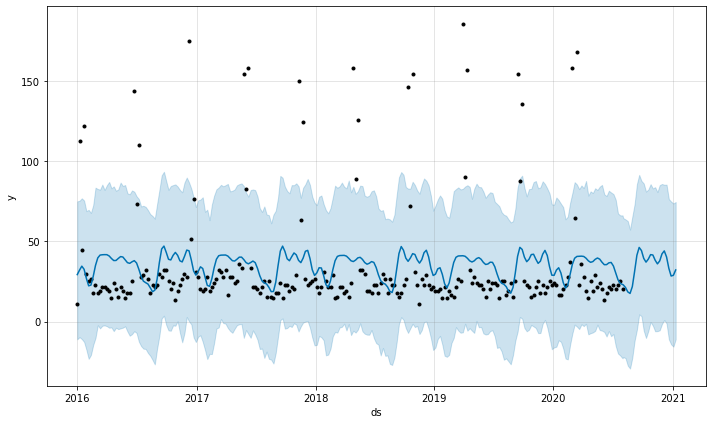

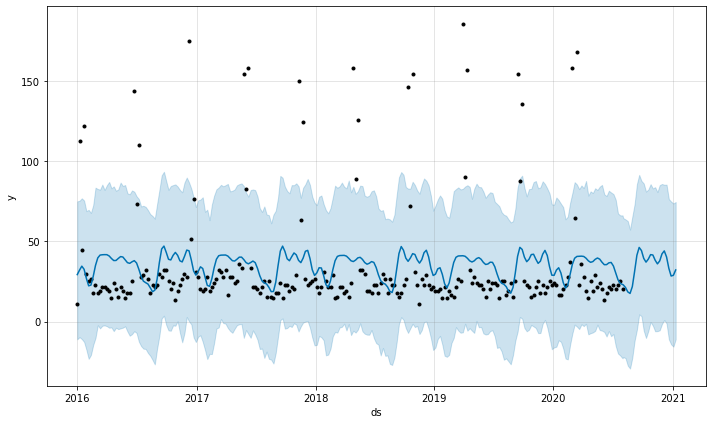

In [ ]:
m.plot(forecast)

In [ ]:

x = forecast['yhat'][240:].values
x

array([22.94121372, 21.31426381, 18.54008661, 17.5509833 , 21.82264648,
       31.33245337, 41.39882401, 46.27807608, 44.32823563, 39.44959504,
       37.10667577, 38.96887759, 41.78636491, 41.56772211, 38.31879532,
       36.0151166 , 37.8620266 , 42.25382515, 44.12437505, 40.34884814,
       33.27122398, 28.43015596, 28.88856097, 32.21697176])

In [ ]:
df

,ds,y
0,2016-01-01,10.8
1,2016-01-08,112.8
2,2016-01-15,44.4
3,2016-01-22,122.4
4,2016-01-29,30.0
...,...,...
235,2020-07-03,22.8
236,2020-07-10,20.4
237,2020-07-17,22.8
238,2020-07-24,25.2


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[24] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=2398.477, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=2557.690, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[24] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,1)[24] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(1,0,1)[24] intercept   : AIC=1837.398, Time=1.03 sec
 ARIMA(0,0,0)(2,0,1)[24] intercept   : AIC=inf, Time=1.62 sec
 ARIMA(0,0,0)(1,0,2)[24] intercept   : AIC=1826.553, Time=3.50 sec
 ARIMA(0,0,0)(0,0,2)[24] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(0,0,0)(2,0,2)[24] intercept   : AIC=inf, Time=4.57 sec
 ARIMA(1,0,0)(1,0,2)[24] intercept   : AIC=inf, Time=3.15 sec
 ARIMA(0,0,1)(1,0,2)[24] intercept   : AIC=inf, Time=3.56 sec
 ARIMA(1,0,1)(1,0,2)[24] intercept   : AIC=inf, Time=3.60 sec
 ARIMA(

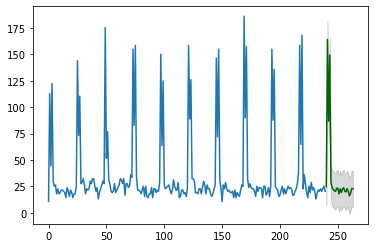

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm


model = pm.auto_arima(df.y, start_p=1, start_q=1,
                      information_criterion='aic',
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=24,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.y), len(df.y)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.y)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

----